# K Nearest Neighbours Project 

## Problem
You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

## Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# to allow the output of plotting commands to be displayed inline
%matplotlib inline
# turn off jedi to allow for faster tab autocomplete usage
%config Completer.use_jedi = False

# set global styling
sns.set_style('whitegrid')
sns.set_palette('YlGnBu_r',3)

df = pd.read_csv('KNN_Project_Data.csv')

df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


There are 1000 rows of numerical data with no missing values. There are 10 anonymized columns plus one TARGET CLASS column to predict which is categorical.

## Exploratory Data Analysis

Since this data is anonymized, I will just show a pair plot with the target class as the hue to see the categorical separation.

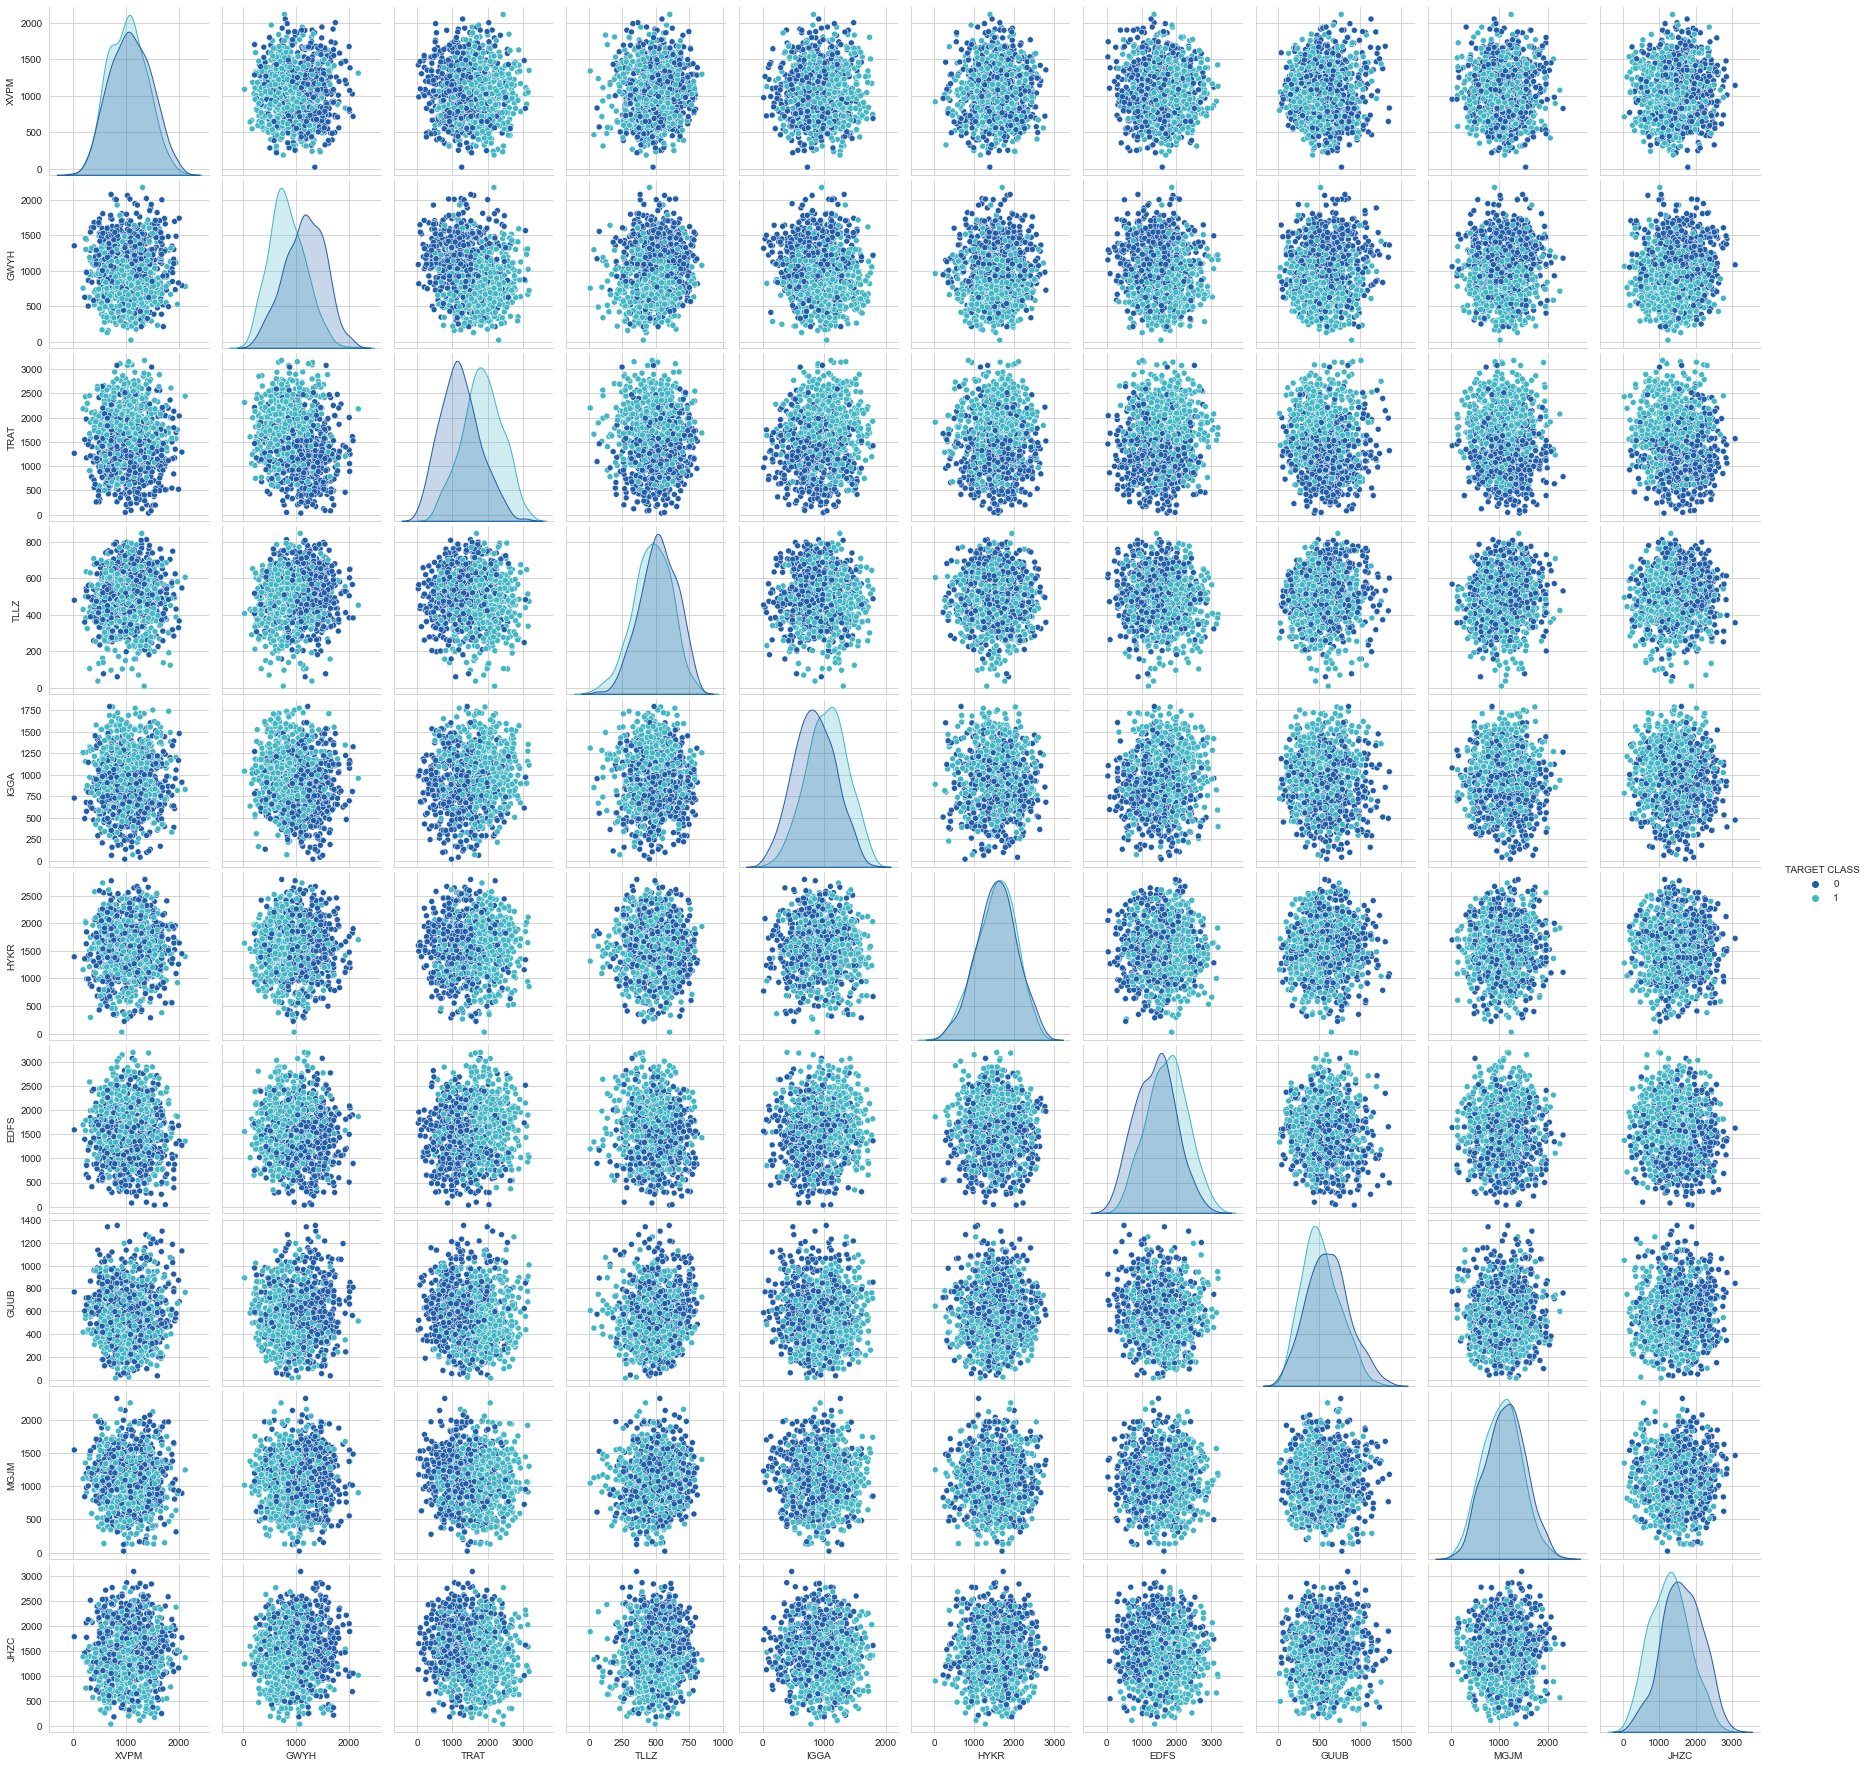

In [3]:
sns.pairplot(df, hue='TARGET CLASS')

## Data Cleaning

I will standardize the feature variables using sklearn.StandardScaler which will transform the data so that each feature has a mean value of 0 with a standard deviation of 1 in order to use KNN.

In [4]:
# instantiate StandardScaler object
scaler = StandardScaler()

# fit features to scaler model
scaler.fit(df.drop('TARGET CLASS', axis=1))

# transform features to a scaled version
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

# convert scaled features to a dataframe
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Model Training

In [5]:
# define the features and category we're predicting
X = df_feat
y = df['TARGET CLASS']

# perform a train test split with test size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# instantiate KNN object starting with K=1
knn = KNeighborsClassifier(n_neighbors=1)

# fit KNN model to train data
knn.fit(X_train, y_train)

# predicting target class based on test features
predictions = knn.predict(X_test)

# evaluate model with K=1
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



Let's see if there is a better K value than 1 by using the Elbow Method and then compare results.

Text(0, 0.5, 'Error Rate')

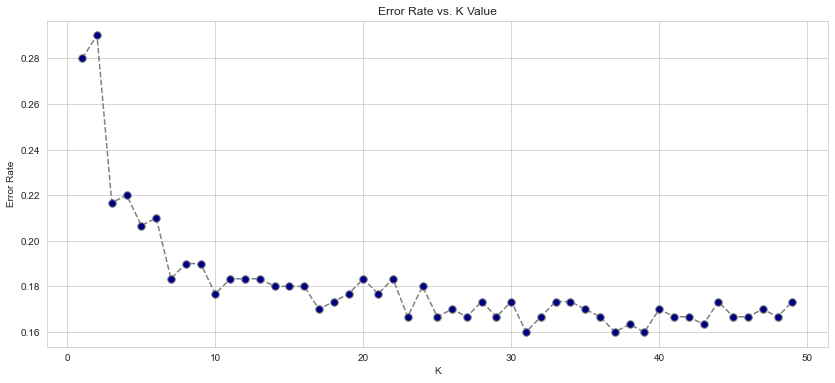

In [6]:
error_rate = []

for k in range(1,50):
    # instantiate KNN object with k
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit KNN model to train data
    knn.fit(X_train, y_train)
    # predict target class
    predictions_k = knn.predict(X_test)
    # append the mean of errors (where prediction does not equal y) to error_rate list
    error_rate.append(np.mean(predictions_k != y_test))
    
# plot error rate vs k value
plt.figure(figsize=(14,6))
plt.plot(range(1,50), error_rate, color='gray', linestyle='--', marker='.', markerfacecolor='navy', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Based on the above graph, I would select a K value of 30 because the error rate seems to level out starting at that value.    
I will now retrain the model using this K value.

In [7]:
# instantiate KNN object starting with K=1
knn = KNeighborsClassifier(n_neighbors=30)

# fit KNN model to train data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

## Model Testing

In [8]:
# predicting target class based on test features
predictions = knn.predict(X_test)

## Model Evaluation

In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Text(0.5, 1.0, 'Confusion Matrix')

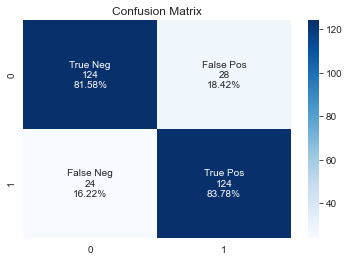

In [10]:
cnf_matrix = confusion_matrix(y_test, predictions)

# confusion matrix in percentages
cnf_percent = np.concatenate((cnf_matrix[0]/np.sum(cnf_matrix[0]), cnf_matrix[1]/np.sum(cnf_matrix[1])))

# set confusion matrix labels
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_percent]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
# create heatmap with labels
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')

By changing K from 1 to 30, the accuracy of the model increased from 72% to 83%. Precision and recall also improved as well.